Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

## Trabalho 2 - Estrutura com múltiplos graus de liberdade

---
_Aluna: Jamile Maria Araujo Tavares_

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.linalg as sc

O presente notebook se refere aos Trabalhos 2.1 e 2.2.

### 2.1 Frequência (${f_1}$) e Forma modal ($\varphi_1$) no 1° modo
Para a primeira parte do segundo trabalho da disciplina de Introdução à Teoria Vibrações, foi necessário a construção de uma estrtura no software [**Ftool** software for structural analysis](https://www.ftool.com.br/Ftool/) de autoria do  _Prof. Luiz Fernando Martha_ do Departamento de Engenharia Civil da TecGraf/PUC, Rio de Janeiro.
A estrutura escolhida foi uma ponte treliçada, com razão entre sua maior dimensão sobre a menor de 12, seguindo o critério que foi solicitado. A estrutura foi inspirada em uma imagem que também está apresentada na Figura 1.
<img src="estrutura.png" width="600" height="600">
$$ Figura. 1: Geometria. da. estrutura $$

Para a área e inércia dos perfis de aço da estrutura foi utilizado o [**catálogo da Gerdau**](https://www2.gerdau.com.br/produtos/cantoneira-gerdau?gclid=Cj0KCQjw4-XlBRDuARIsAK96p3CfDXMgZ8EsKKNymvkZndUZTKNqgPNlIRId9X8BTdnbfMm6gmW46iAaAs-qEALw_wcB), o perfil escolhido foi de seção U. Os dados de entrada no ftool, seguem:

\begin{align*}
E=200 GPa\\
A=15.50 cm^2\\
I=546.00 cm^4
\end{align*}
<img src="tabela gerdau.png" width="400" height="400">
$$ Figura. 2: Catalogo. da. Gerdau $$

Para obter a matriz de rigidez através da matriz de flexibilidade e da matriz de massa concentrada, conhecida na literatura como lumped, a estrutura foi carregada em seis pontos por uma carga de 1kN (F) e com o uso da simetria, foram obtidos os deslocamentos (u) no banzo superior para todos os seus onze pontos carregados. A Figura 3 apresenta a estrutura em três situações de carregamento e sua respectiva deformada.
<img src="deformada.png" width="500" height="500">
$$ Figura. 3: Carregamento. e. estrutura. deformada $$

Conhecidos os deslocamentos, esses foram organizados em uma matriz 11x11, onde cada coluna representa um dos onze carregamentos e as linhas os deslocamentos nos onze pontos do banzo superior para cada posição da carga. A divisão dos deslocamentos $\vec{u}$ pela carga $\vec{F}$ fornece os coeficientes da matriz de flexibilidade $\mathbf{H}$.
$$ \vec{u} = \mathbf{H} \vec{F}$$

In [2]:
# Coeficientes de flexibilidade em m/N
H1 = np.array([[0.0310, 0.0470, 0.0576, 0.0634, 0.0649, 0.0626, 0.0571, 0.0489, 0.0382, 0.0266, 0.0136],
               [0.0470, 0.0919, 0.1105, 0.1226, 0.1261, 0.1220, 0.1101, 0.0957, 0.0750, 0.0522, 0.0266],
               [0.0576, 0.1105, 0.1539, 0.1731, 0.1797, 0.1750, 0.1594, 0.1382, 0.1093, 0.0755, 0.0382],
               [0.0634, 0.1226, 0.1731, 0.2139, 0.2220, 0.2182, 0.2016, 0.1742, 0.1382, 0.0957, 0.0489],
               [0.0649, 0.1261, 0.1797, 0.2220, 0.2493, 0.2486, 0.2318, 0.2016, 0.1598, 0.1105, 0.0571],
               [0.0626, 0.1220, 0.1773, 0.2182, 0.2486, 0.2660, 0.2486, 0.2182, 0.1773, 0.1220, 0.0626],
               [0.0571, 0.1105, 0.1598, 0.2016, 0.2318, 0.2486, 0.2493, 0.2220, 0.1797, 0.1261, 0.0649],
               [0.0489, 0.0957, 0.1382, 0.1742, 0.2016, 0.2182, 0.2220, 0.2139, 0.1731, 0.1226, 0.0634],
               [0.0382, 0.0755, 0.1093, 0.1382, 0.1594, 0.1773, 0.1797, 0.1731, 0.1539, 0.1105, 0.0576],
               [0.0266, 0.0522, 0.0750, 0.0957, 0.1101, 0.1220, 0.1261, 0.1226, 0.1105, 0.0919, 0.0470],
               [0.0136, 0.0266, 0.0382, 0.0489, 0.0571, 0.0626, 0.0649, 0.0634, 0.0576, 0.0470, 0.0310]])*1e-6  

Para determinar a matriz de rigidez $\mathbf{K}$ basta inverter a matriz de flexibilidade $\mathbf{H}$, como é demonstrado:
$$ \vec{u} = \mathbf{H} \vec{F}$$
$$ \mathbf{H}^{-1} \vec{u} = \mathbf{H}^{-1} \mathbf{H} \vec{F}$$
$$ \mathbf{K} \vec{u} = \vec{F}$$
Logo, $$ \mathbf{H}^{-1}=\mathbf{K} $$

In [3]:
# Coeficientes de rigidez em N/m
K = np.linalg.inv(H1)

Na Figura 2, a seção do perfil U de aço utilizado na treliça apresenta massa por metro linear de 12,20 kg/m. Dividindo a massa da treliça pelos cinco nós cada um deles receberia o equivalente a 3 perfis horizontais, 4 verticais e 2 perfis inclinados, logo cada nó recebe aproximadamente 10m de aço, ou 122kg.

Porém, a massa adotada está acima da calculada para que provocasse na estrutura uma frequência abaixo de 2Hz e, consequentemente, a estrutura apresentasse problemas dinâmicos. A massa adotada por nó foi $10^{4}$ kg.

In [4]:
# Matriz de massa agrupada em kg
M=np.eye(11)*1e4

Em seguida foi calculada a forma modal ($\varphi_1$).


In [5]:
# Uses scipy to solve the standard eigenvalue problem
w21, Phi1  =  sc.eig(K, M)
# Ensure ascending order of eigenvalues
iw   = w21.argsort()
w21  = w21[iw]
Phi1 = Phi1[:,iw]
print(Phi1[:,0])

[-0.10543733 -0.20389158 -0.28812679 -0.35394313 -0.39365482 -0.40952988
 -0.39366365 -0.3539586  -0.2887642  -0.20390731 -0.10544594]


E por último a frequência (${f_1}$).

In [6]:
# Eigenvalues to vibration frequencies
wk1  = np.sqrt(np.real(w21)) 
fk1  = wk1/2/np.pi
print(fk1[0])

1.2889755917160892


Em seguida, foram plotados os primeiros 4 modos de vibração.

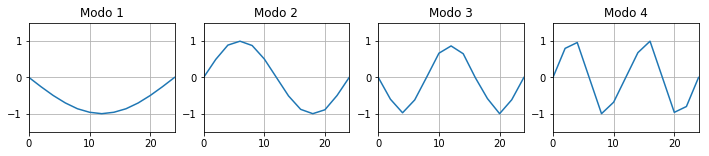

In [7]:
# Visualização dos modos de vibração
plt.figure(1, figsize=(12,2))
x = np.arange(0,26,2)

for i in range(4):
    pk = np.zeros(13)
    pk[1:-1] = Phi1[:,i]
    pm = np.max(np.abs(pk)) 
    
    plt.subplot(1,4,i+1)
    plt.plot(x, pk/pm)
    
    plt.axis([0, 24, -1.5, 1.5])
    plt.title('Modo {0}'.format(i+1))
    plt.grid(True)

### 2.2 Resposta da estrutura a um impacto
Um impulso em uma estrutura pode ser causado por uma massa (m) que sofre um impacto com a estrutura a uma velocidade (vo). O impulso pode ser calculado como o produto da massa e da velocidade.
$$ \mathbf{I} = \mathbf{m} \mathbf{v_o}$$
Onde a velocidade pode ser calculada em função da força de impacto, da massa e do tempo de duração, que pode ser estimado como um quarto do período natural, por ser de curta duração.
$$ \mathbf{v_o} = \frac{\mathbf{F} \mathbf{t_d}}{\mathbf{m}}$$
Foi considerado que o impacto ocorre no nó central da estrutura, por isso a velocidade calculada se refere a esse nó.

In [8]:
#Dados de entrada para o impacto na estrutura
m=1000 #kg
F=10000 #N
Tn=1/fk1[10]
td=Tn/4
vo=F*td/m
I=m*vo
v=np.array([0, 0, 0, 0, 0, vo, 0, 0, 0, 0, 0])

O parâmetro $\theta$ usado vale -$\pi$/2.
Para calcular os deslocamentos máximos após o impacto, primeiro foi calculado a massa $\mathbf{M_i}$. E em seguida $u_{\rm i max}$ foi calculado, para finalmente determinar o vetor $\vec{u}(t)$, as equações utilzadas seguem:
$$ \vec{\varphi_i}^{T} \mathbf{M} \vec{\varphi_i} = \mathbf{M_i}$$
$$ \vec{\varphi_i}^{T} \mathbf{M}  \vec{v_o} = -u_{\rm i max} \mathbf{\omega_i} sen ( - \theta_{\rm i}) \mathbf{M_i}$$
$$ \vec{u}(t)  = \sum u_{\rm i max} cos ( \mathbf{\omega_i} t - \theta_{\rm i}) \vec{\varphi_i}$$

0.03862609389921701


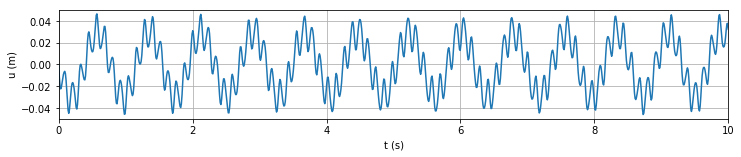

In [9]:
ui_max = np.zeros(11)
t = np.linspace(0, 10, 1000)
ui = np.zeros((11, 1000))
for i in range(11):
    Mi = np.dot(np.dot(Phi1.transpose()[i],M),Phi1[i])
    ui_max[i] = np.dot(np.dot(Phi1.transpose()[i],M),v)/(Mi*wk1[i])
    ui [i,:] = ui_max[i]*np.cos(-wk1[i]*t-np.pi/2) #Matriz com os deslocamentos para cada gdl
u=np.dot(Phi1, ui)

print(np.max(ui_max)) #deslocamento máximo para o nó escolhido
plt.figure(2, figsize=(12,2))
plt.plot(t, u[5,:]) #referente ao gdl que recebe o impacto
plt.axis([0, 10, -0.05, 0.05])
plt.xlabel("t (s)")
plt.ylabel("u (m)")
plt.grid(True)


Foram utilizadas as seguintes igualdades para o cálculo de $\alpha_0$ e $\alpha_1$. Foi adotado $\zeta_1$ = 0.01 e $\zeta_2$ = 0.01, por ser o valor comumente empregado em estruturas da engenharia civil.

$$\alpha_1 = \frac{2 (\zeta_0\omega_0 - \zeta_1\omega_1)}{\mathbf\omega_0^{2}-\omega_1^{2}}$$

$$\alpha_0 = 2\zeta_0\omega_0 - \alpha_1\omega_1^{2}$$

Para cálculo do amortecimento $\zeta_i$ em cada modo de vibração foi utilizada a seguinte equação:

$$\zeta_i = \frac{\alpha_0+\alpha_1\omega_i^{2}}{ 2\mathbf{\omega_i}}$$

In [10]:
zeta = np.zeros(11)
zeta[0] = 0.01
zeta[1] = 0.01
alpha1 = 2*(zeta[0]*wk1[0]-zeta[1]*wk1[1])/(wk1[0]**2-wk1[1]**2)
alpha0 = 2*zeta[0]*wk1[0]-alpha1*wk1[1]**2

for i in range (9):
    zeta[i+2] = (alpha0/(2*wk1[i+2]))+(alpha1*wk1[i+2]/2)

print(alpha0)    
print(alpha1)

-0.2744138005999084
0.0005523997477661471
